In [1]:
import pandas as pd
from rdkit import Chem
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from rdkit.Chem import PandasTools

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

def show_atom_number(mol, label):
    for atom in mol.GetAtoms():
        atom.SetProp(label, str(atom.GetIdx()+1))
    return mol

In [2]:
## Starting structures stereochemistry
start = pd.read_excel('../Data/Kolchicyna_prepared_data.xlsx')

In [3]:
start.head()

,Unnamed: 0,Publikacja DOI,Numer związku w publikacji,SMILES,Atywność [nM],A549,MCF-7,LoVo,LoVo/DX,BALB/3T3,A549_float,MCF-7_float,LoVo_float,LoVo/DX_float,BALB/3T3_float
0,0,https://doi.org/10.1016/j.bmcl.2021.128382,1,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,Atywność [nM],"10,8","10,3","6,5","54,9","10,2",10.8,10.3,6.5,54.9,10.2
1,1,https://doi.org/10.1016/j.bmcl.2021.128382,2,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,Atywność [nM],"11,6","12,0","8,5",31.1,14.3,11.6,12.0,8.5,31.1,14.3
2,2,https://doi.org/10.1016/j.bmcl.2021.128382,3,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,Atywność [nM],"10,9","12,2","8,8","17,9","11,7",10.9,12.2,8.8,17.9,11.7
3,3,https://doi.org/10.1016/j.bmcl.2021.128382,4,CC(C)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)...,Atywność [nM],"10,5","11,3","8,5","10,2","11,0",10.5,11.3,8.5,10.2,11.0
4,4,https://doi.org/10.1016/j.bmcl.2021.128382,5,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,Atywność [nM],"89,5","92,7","52,8","77,8","99,4",89.5,92.7,52.8,77.8,99.4


In [4]:
## https://www.rdkit.org/docs/RDKit_Book.html

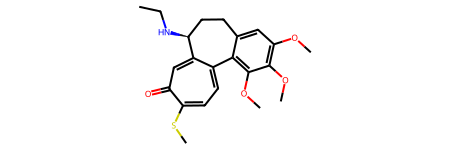

In [5]:
Chem.MolFromSmiles(start['SMILES'][0])

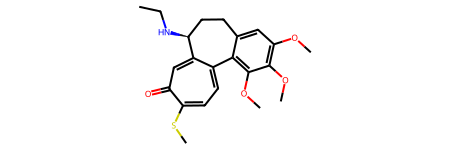

In [6]:
x = Chem.MolFromSmiles(start['SMILES'][0])
Chem.AssignStereochemistry(x)
x

In [7]:
xx = Chem.FindMolChiralCenters(x)
xx

[(14, 'S')]

In [8]:
xx[0][1]

'S'

In [9]:
atom_num = []
chirality = []

for smiles in start['SMILES']:
    mol = Chem.MolFromSmiles(smiles)
    chiral = Chem.FindMolChiralCenters(mol)
    atom_num.append(chiral[0][0])
    chirality.append(chiral[0][1])
print("Job finished...")

Job finished...


In [10]:
start['atom_num'] = atom_num
start['chirality'] = chirality
start.head()

,Unnamed: 0,Publikacja DOI,Numer związku w publikacji,SMILES,Atywność [nM],A549,MCF-7,LoVo,LoVo/DX,BALB/3T3,A549_float,MCF-7_float,LoVo_float,LoVo/DX_float,BALB/3T3_float,atom_num,chirality
0,0,https://doi.org/10.1016/j.bmcl.2021.128382,1,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,Atywność [nM],"10,8","10,3","6,5","54,9","10,2",10.8,10.3,6.5,54.9,10.2,14,S
1,1,https://doi.org/10.1016/j.bmcl.2021.128382,2,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,Atywność [nM],"11,6","12,0","8,5",31.1,14.3,11.6,12.0,8.5,31.1,14.3,14,S
2,2,https://doi.org/10.1016/j.bmcl.2021.128382,3,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,Atywność [nM],"10,9","12,2","8,8","17,9","11,7",10.9,12.2,8.8,17.9,11.7,14,S
3,3,https://doi.org/10.1016/j.bmcl.2021.128382,4,CC(C)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)...,Atywność [nM],"10,5","11,3","8,5","10,2","11,0",10.5,11.3,8.5,10.2,11.0,5,S
4,4,https://doi.org/10.1016/j.bmcl.2021.128382,5,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,Atywność [nM],"89,5","92,7","52,8","77,8","99,4",89.5,92.7,52.8,77.8,99.4,14,S


In [11]:
r_struct = start[start['chirality'] == 'R']

In [12]:
r_struct

,Unnamed: 0,Publikacja DOI,Numer związku w publikacji,SMILES,Atywność [nM],A549,MCF-7,LoVo,LoVo/DX,BALB/3T3,A549_float,MCF-7_float,LoVo_float,LoVo/DX_float,BALB/3T3_float,atom_num,chirality
22,22,https://doi.org/10.1016/j.bmcl.2021.128382,COLCH,COc3cc2CC[C@@H](NC(C)=O)c1cc(=O)c(OC)ccc1c2c(O...,Atywność [nM],"19,3","10,1","12,7","966,8","82,3",19.3,10.1,12.7,966.8,82.3,7,R
117,117,https://doi.org/10.1016/j.bmcl.2021.128197,26,OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)CNC(=S)N[...,Atywność [nM],930,1200,680,6600,1300,930.0,1200.0,680.0,6600.0,1300.0,2,R


In [13]:
r_struct_0 = Chem.MolFromSmiles(r_struct['SMILES'][22]) # structure no. 23 in Kolchicyna_prepared_data.xlsx

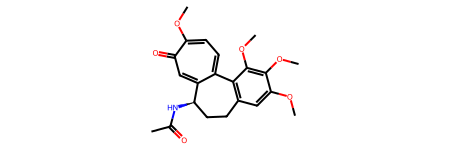

In [14]:
r_struct_0 ## correct SMILES is -> COc1cc2CC[C@H](NC(C)=O)c3cc(=O)c(OC)ccc3-c2c(OC)c1OC (Marvin Sketch Generated)

In [15]:
xx = Chem.FindMolChiralCenters(r_struct_0)
xx

[(7, 'R')]

In [16]:
r_struct['SMILES'][22] # -> This SMILES is for R absolute configuration colchicine, and the experiment was conducted for S absolute configuration colchicine

'COc3cc2CC[C@@H](NC(C)=O)c1cc(=O)c(OC)ccc1c2c(OC)c3OC'

In [17]:
Chem.FindMolChiralCenters(Chem.MolFromSmiles('COc1cc2CC[C@H](NC(C)=O)c3cc(=O)c(OC)ccc3-c2c(OC)c1OC'))

[(7, 'S')]

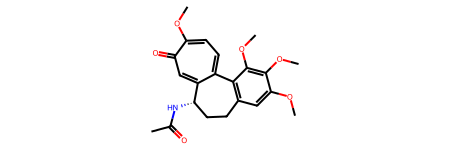

In [18]:
Chem.MolFromSmiles('COc1cc2CC[C@H](NC(C)=O)c3cc(=O)c(OC)ccc3-c2c(OC)c1OC')

In [19]:
start['chirality'][22] = 'S'

C:\Users\aleks\AppData\Local\Temp\ipykernel_26592\131833170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start['chirality'][22] = 'S'


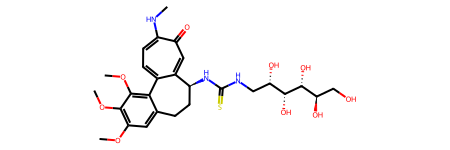

In [20]:
r_struct_1 = Chem.MolFromSmiles(r_struct['SMILES'][117])
r_struct_1

In [21]:
xx = Chem.FindMolChiralCenters(r_struct_1)
xx

[(2, 'R'), (4, 'R'), (6, 'R'), (8, 'S'), (15, 'S')]

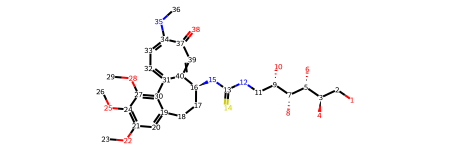

In [22]:
show_atom_number(r_struct_1, 'atomLabel')

In [23]:
start['chirality'][117] = 'S'

C:\Users\aleks\AppData\Local\Temp\ipykernel_26592\2686388605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start['chirality'][117] = 'S'


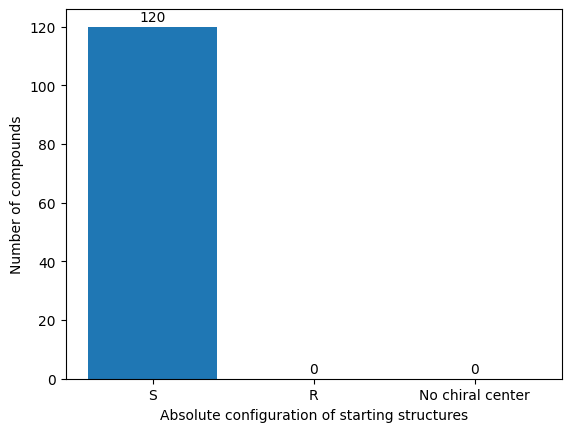

In [24]:
fig, ax = plt.subplots()
bar_container = ax.bar(['S', 'R', 'No chiral center'], [len(start[start['chirality'] == 'S']), len(start[start['chirality'] == 'R']), len(start[start['chirality'] == 'No chiral center'])])
ax.set(xlabel = 'Absolute configuration of starting structures', ylabel='Number of compounds')
plt.rc('grid', linestyle="-.", color='black')
plt.grid(False)
ax.bar_label(bar_container, padding=2, label_type='edge')
plt.savefig('chirality_starting.pdf', bbox_inches='tight')

In [25]:
len(start[start['chirality'] == 'No chiral centre'])

0

In [26]:
for i, smiles in enumerate(start['SMILES']):
    mol = Chem.MolFromSmiles(smiles)
    chiral = Chem.FindMolChiralCenters(mol)
    print(i, chiral)

0 [(14, 'S')]
1 [(14, 'S')]
2 [(14, 'S')]
3 [(5, 'S')]
4 [(14, 'S')]
5 [(6, 'S')]
6 [(14, 'S')]
7 [(7, 'S')]
8 [(14, 'S')]
9 [(14, 'S')]
10 [(14, 'S')]
11 [(13, 'S')]
12 [(9, 'S')]
13 [(11, 'S')]
14 [(11, 'S')]
15 [(9, 'S')]
16 [(9, 'S')]
17 [(9, 'S')]
18 [(9, 'S')]
19 [(14, 'S')]
20 [(14, 'S')]
21 [(14, 'S')]
22 [(7, 'R')]
23 [(7, 'S')]
24 [(7, 'S')]
25 [(4, 'S')]
26 [(12, 'S')]
27 [(13, 'S')]
28 [(14, 'S')]
29 [(4, 'S')]
30 [(13, 'S')]
31 [(14, 'S')]
32 [(4, 'S')]
33 [(16, 'S')]
34 [(17, 'S')]
35 [(18, 'S')]
36 [(4, 'S')]
37 [(17, 'S')]
38 [(18, 'S')]
39 [(4, 'S')]
40 [(14, 'S')]
41 [(14, 'S')]
42 [(13, 'S')]
43 [(13, 'S')]
44 [(13, 'S')]
45 [(13, 'S')]
46 [(13, 'S')]
47 [(13, 'S')]
48 [(13, 'S')]
49 [(9, 'S')]
50 [(12, 'S')]
51 [(13, 'S')]
52 [(12, 'S')]
53 [(13, 'S')]
54 [(13, 'S')]
55 [(9, 'S')]
56 [(10, 'S')]
57 [(8, 'S')]
58 [(16, 'S')]
59 [(10, 'S')]
60 [(8, 'S')]
61 [(24, 'S')]
62 [(15, 'S')]
63 [(19, 'S')]
64 [(16, 'S')]
65 [(13, 'S')]
66 [(12, 'S')]
67 [(24, 'S')]
68 [(12, '

In [27]:
to_be_printed = pd.DataFrame(data=start['SMILES'], columns=['SMILES'])
to_be_printed['Chirality'] = [Chem.FindMolChiralCenters(Chem.MolFromSmiles(smiles)) for smiles in to_be_printed['SMILES']]
to_be_printed['Mol Image'] = [Chem.MolFromSmiles(smi) for smi in to_be_printed['SMILES']]
PandasTools.SaveXlsxFromFrame(to_be_printed, '../Data/start_structures_chirality.xlsx', molCol='Mol Image')

In [28]:
to_be_printed.head()

,SMILES,Chirality,Mol Image
0,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,"[(14, S)]",<rdkit.Chem.rdchem.Mol object at 0x00000218896...
1,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,"[(14, S)]",<rdkit.Chem.rdchem.Mol object at 0x00000218896...
2,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,"[(14, S)]",<rdkit.Chem.rdchem.Mol object at 0x00000218896...
3,CC(C)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)...,"[(5, S)]",<rdkit.Chem.rdchem.Mol object at 0x00000218896...
4,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,"[(14, S)]",<rdkit.Chem.rdchem.Mol object at 0x00000218896...


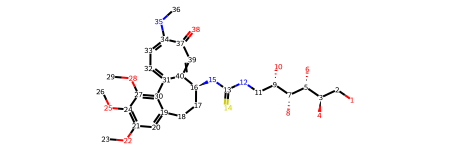

In [29]:
mol = Chem.MolFromSmiles('OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)CNC(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12')
show_atom_number(mol, 'atomLabel')

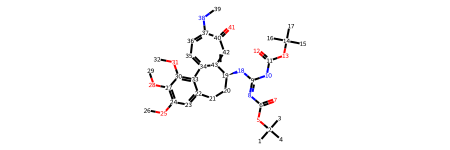

In [30]:
mol = Chem.MolFromSmiles(to_be_printed.iloc[-2]['SMILES'])
show_atom_number(mol, 'atomLabel')

In [31]:
to_be_printed.iloc[-2]['SMILES']

'CC(C)(C)OC(=O)\\N=C(/NC(=O)OC(C)(C)C)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12'

In [32]:
## new structures stereochemistry
new = pd.read_excel('../Data/Whole_report.xlsx')

In [33]:
new.head()

,Unnamed: 0,SMILES,SYBA score,A549 [nM],BALB/3T3 [nM],LoVo [nM],LoVo/DX [nM],MCF-7 [nM]
0,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,45.88,10.168579,6.200000,5.700000,136.586050,8.357629
1,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,68.25,10.648944,9.439809,17.460496,49.797629,10.167834
2,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,74.22,11.794066,30.305940,54.000000,37.606395,9.099151
3,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,40.43,6.400000,23.752895,8.570105,210.367783,5.400000
4,NaN,O=CC1=CN=NN1[C@H1]2CCC3=CC(OC)=C(OC)C(OC)=C3C4...,41.84,4.774935,11.772850,10.000000,1806.439871,12.029326


In [34]:
atom_num = []
chirality = []
issue = []
for smiles in new['SMILES']:
    try:
        mol = Chem.MolFromSmiles(smiles)
        chiral = Chem.FindMolChiralCenters(mol)
        atom_num.append(chiral[0][0])
        chirality.append(chiral[0][1])
    except:
        issue.append(smiles)
print("Job finished...")

Job finished...


In [35]:
issue

['CC(=O)N[C@@H1]C1=C2C(C(NC)=CC=C1C3=C(OC)C(OC)=C(OC)C=C3CC2)=O',
 'CNC(NCCCC)=S[C@@H1]C1=CC(=O)C(NC)=CC=C1C2=C(C=C(OC)C(=C2OC)OC)CCF',
 'C1=2[C@H1]CCC3=CC(OC)=C(OC)C(OC(CC)=O)=C3C1=CC=C(C(C=2)=O)SCNC(=O)CSC',
 'O=C(C1=C(C(OCC)=O)N(N=N1)[C@@H1]C2=C3C(C(NC)=CC=C2C4=C(C(OC)=C(OC)C=C4CC3)OC)=O)O',
 'C=12N(N=NC=1C(OCC3=CC=C(C=C3)F)=O)C(OC)=C(OC)C(OC)=CC4=CC=C(C(=O)C=C24)NC',
 'C=1N(N=NC=1C(=O)OCC2=CC=C(C=C2)F)CC(OC)=C(OC)C(OC)=CC3=CC=C(NC)C(=O)C=C3',
 'O=CC1=C(C(OCC)=O)N(N=N1)[C@@H1]C2=C3C(C(NC)=CC=C2C4=C(C(OC)=C(OC)C=C4CC3)OC)=O',
 'O=C(O)C1=C(C(OCC)=O)N=NN1[C@H1]CCC2=CC(OC)=C(OC)C(OC)=C2C3=CC=C(C(C=C3)=O)NC',
 'CCCCCCCCCCCCCCCC(OCC1=CN(N=N1)[C@H1]C2CC3=CC(OC)=C(OC)C(OC)=C3C4=CC=C(C(=O)C=C24)NC)=O',
 'OC(=O)C1=C(C(OCC)=O)N(N=N1)[C@H1]C2CC3=CC(OC)=C(OC)C(OC)=C3C4=CC=C(NC)C(=O)C=C42',
 'N(C)C(=O)NCCC(OCC1=CN(N=N1)[C@H1]CCC2=CC(OC)=C(OC)C(OC)=C2C3=CC=C(C(=O)C=C3)N)C=O',
 'CC(C)(C)OC(=O)NCCC(NCC=1N=NN(C=1)[C@H1]C2CC3=CC(OC)=C(OC)C(OC)=C3C4=CC=C(C(=O)C=C24)N)C=O',
 'CC(C)(C)OC(=O)NCCC(OCC=1N=N

In [36]:
mol = Chem.MolFromSmiles(issue[0])
chiral = Chem.FindMolChiralCenters(mol)
chiral

[]

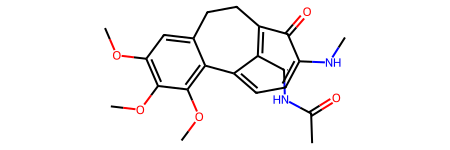

In [37]:
mol

[]


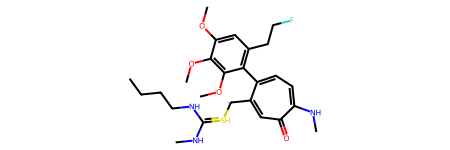

In [38]:
mol = Chem.MolFromSmiles(issue[1])
chiral = Chem.FindMolChiralCenters(mol)
print(chiral)
mol

[]


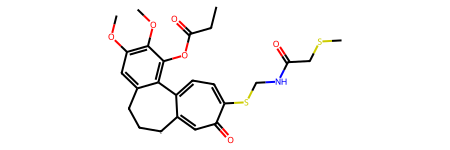

In [39]:
mol = Chem.MolFromSmiles(issue[2])
chiral = Chem.FindMolChiralCenters(mol)
print(chiral)
mol

In [40]:
len(issue)

42

In [41]:
atom_num = []
chirality = []
issue = []
for smiles in new['SMILES']:
    mol = Chem.MolFromSmiles(smiles)
    chiral = Chem.FindMolChiralCenters(mol)
    try:
        atom_num.append(chiral[0][0])
        chirality.append(chiral[0][1])
    except:
        atom_num.append(0)
        chirality.append('No chiral center')
print("Job finished...")

Job finished...


In [42]:
new['atom_num'] = atom_num
new['chirality'] = chirality
new.head()

,Unnamed: 0,SMILES,SYBA score,A549 [nM],BALB/3T3 [nM],LoVo [nM],LoVo/DX [nM],MCF-7 [nM],atom_num,chirality
0,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,45.88,10.168579,6.200000,5.700000,136.586050,8.357629,14,S
1,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,68.25,10.648944,9.439809,17.460496,49.797629,10.167834,14,S
2,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,74.22,11.794066,30.305940,54.000000,37.606395,9.099151,14,S
3,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,40.43,6.400000,23.752895,8.570105,210.367783,5.400000,14,S
4,NaN,O=CC1=CN=NN1[C@H1]2CCC3=CC(OC)=C(OC)C(OC)=C3C4...,41.84,4.774935,11.772850,10.000000,1806.439871,12.029326,7,S


In [43]:
to_be_printed = pd.DataFrame(data=new['SMILES'], columns=['SMILES'])
chirality = []
for i, smiles in enumerate(new['SMILES']):
    mol = Chem.MolFromSmiles(smiles)
    
    chiral = Chem.FindMolChiralCenters(mol)
    if len(chiral) > 0:
        
        chirality.append(chiral)
    else:
        chirality.append('No chiral center')

to_be_printed['Chirality'] = chirality
to_be_printed['Mol Image'] = [Chem.MolFromSmiles(smi) for smi in to_be_printed['SMILES']]
PandasTools.SaveXlsxFromFrame(to_be_printed, '../Data/new_structures_chirality.xlsx', molCol='Mol Image')

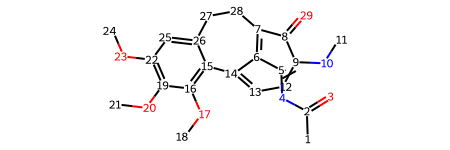

In [44]:
mol = Chem.MolFromSmiles('CC(=O)N[C@@H1]C1=C2C(C(NC)=CC=C1C3=C(OC)C(OC)=C(OC)C=C3CC2)=O')
show_atom_number(mol, 'atomLabel')

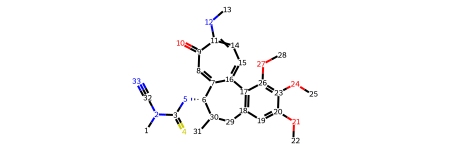

In [45]:
mol = Chem.MolFromSmiles('CN(C(=S)N[C@@H1]1C2=CC(=O)C(NC)=CC=C2C3=C(C=C(OC)C(OC)=C3OC)CC1C)C#N')
show_atom_number(mol, 'atomLabel')

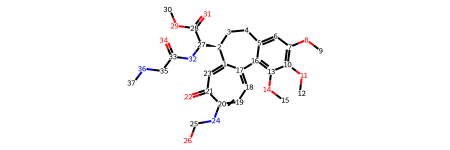

In [46]:
mol = Chem.MolFromSmiles('C1=2[C@H1](CCC3=CC(OC)=C(OC)C(OC)=C3C1=CC=C(C(=O)C=2)NCO)C(C(OC)=O)NC(=O)CNC')
show_atom_number(mol, 'atomLabel')

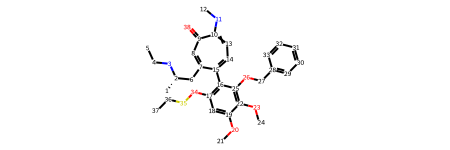

In [47]:
mol = Chem.MolFromSmiles('C[C@H1](NCC)CC1=CC(C(NC)=CC=C1C2=C(C=C(OC)C(OC)=C2OCC3=CC=CC=C3)OSCC)=O')
show_atom_number(mol, 'atomLabel')

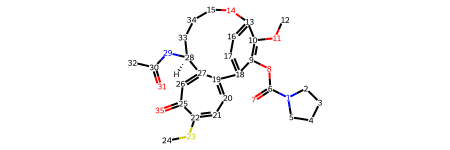

In [48]:
mol = Chem.MolFromSmiles('N1(CCCC1)C(=O)OC2=C(OC)C(OC3)=CC=C2C4=CC=C(SC)C(C=C4[C@@H1](NC(=O)C)CC3)=O')
show_atom_number(mol, 'atomLabel')

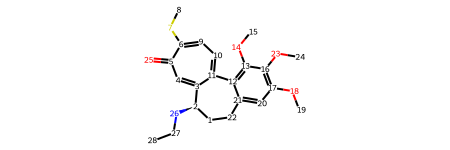

In [49]:
mol = Chem.MolFromSmiles('C1[C@H1](C2=CC(C(SC)=CC=C2C3=C(OC)C(=C(OC)C=C3C1)OC)=O)NCC')
show_atom_number(mol, 'atomLabel')

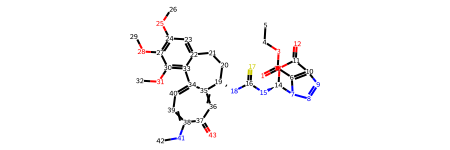

In [50]:
mol = Chem.MolFromSmiles('O=C(OCC)C=1N(N=NC=1C(=O)O2)[C@H1]2NC(=S)N[C@H1]3CCC4=CC(OC)=C(OC)C(OC)=C4C=5C3=CC(C(=CC=5)NC)=O')
show_atom_number(mol, 'atomLabel')

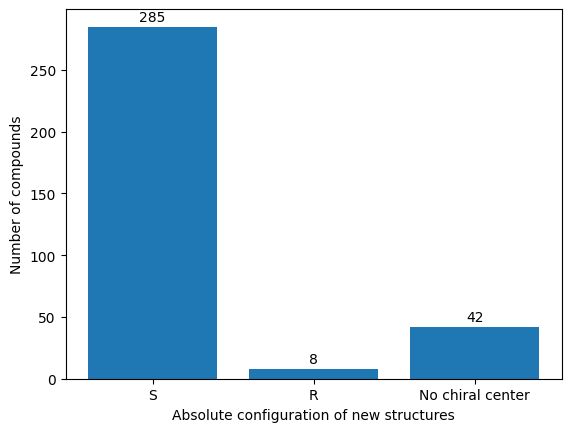

In [51]:
fig, ax = plt.subplots()
bar_container = ax.bar(['S', 'R', 'No chiral center'], [len(new[new['chirality'] == 'S']), len(new[new['chirality'] == 'R']), len(new[new['chirality'] == 'No chiral center'])])
ax.set(xlabel = 'Absolute configuration of new structures', ylabel='Number of compounds')
plt.rc('grid', linestyle="-.", color='black')
plt.grid(False)
ax.bar_label(bar_container, padding=2, label_type='edge')
plt.savefig('chirality_new.pdf', bbox_inches='tight')

In [52]:
len(new[new['chirality'] =='S'])

285

In [53]:
len(new[new['chirality'] =='R'])

8

In [54]:
len(new[new['chirality'] =='No chiral center'])

42

In [55]:
to_save = new[new['chirality'] =='S']
to_save.to_excel('../Data/new_structures_S_chirality.xlsx')

In [56]:
for i, smiles in enumerate(new['SMILES']):
    mol = Chem.MolFromSmiles(smiles)
    
    chiral = Chem.FindMolChiralCenters(mol)
    if len(chiral) > 0:
        
        print(i, chiral)
    else:
        print(i, 'No chiral center')

0 [(14, 'S')]
1 [(14, 'S')]
2 [(14, 'S')]
3 [(14, 'S')]
4 [(7, 'S')]
5 [(9, 'S')]
6 [(9, 'S')]
7 [(4, 'S')]
8 [(1, 'S')]
9 [(5, 'S')]
10 [(1, 'S')]
11 [(1, 'R')]
12 [(14, 'S')]
13 [(14, 'S')]
14 [(4, 'S')]
15 [(11, 'S')]
16 [(18, 'S')]
17 [(18, 'S')]
18 [(18, 'S')]
19 [(13, 'S')]
20 [(4, 'S')]
21 [(19, 'S')]
22 [(4, 'S')]
23 [(10, 'S')]
24 [(10, 'S')]
25 [(4, 'S')]
26 No chiral center
27 [(14, 'S')]
28 [(14, 'S')]
29 [(14, 'S')]
30 [(14, 'S')]
31 [(13, 'S')]
32 No chiral center
33 [(5, 'S')]
34 [(7, 'S')]
35 [(13, 'S')]
36 [(13, 'S')]
37 [(24, 'S')]
38 No chiral center
39 [(14, 'S')]
40 [(12, 'S')]
41 [(6, 'S')]
42 [(11, 'S')]
43 No chiral center
44 [(1, 'S')]
45 No chiral center
46 No chiral center
47 No chiral center
48 [(9, 'S')]
49 [(12, 'S')]
50 [(9, 'S')]
51 [(13, 'S')]
52 [(13, 'S')]
53 [(10, 'S')]
54 [(8, 'S')]
55 No chiral center
56 No chiral center
57 No chiral center
58 [(12, 'R')]
59 No chiral center
60 [(16, 'S')]
61 [(1, 'S')]
62 [(10, 'S')]
63 [(3, 'S')]
64 [(14, 'S')]
6